In [1]:
# Import the modules
from sklearn.externals import joblib
# from sklearn import datasets  # it has been deprecated now
from sklearn.datasets import fetch_openml
from skimage.feature import hog
from sklearn.svm import LinearSVC
import numpy as np
from collections import Counter

# Load the dataset
# dataset = datasets.fetch_mldata("MNIST Original") # it has been deprecated
dataset = fetch_openml('mnist_784')

# Extract the features and labels
features = np.array(dataset.data, 'int16') 
labels = np.array(dataset.target, 'int')

# Extract the hog features
list_hog_fd = []
for feature in features:
    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(7,7), cells_per_block=(1, 1), visualise=False)
    list_hog_fd.append(fd)
hog_features = np.asarray(list_hog_fd, 'float64')

print "Count of digits in dataset", Counter(labels)

# Create an linear SVM object
clf = LinearSVC()

# Perform the training
clf.fit(hog_features, labels)

# # Save the classifier
# joblib.dump(clf, "digits_cls.pkl", compress=3)

/usr/local/lib/python2.7/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/usr/local/lib/python2.7/dist-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


Count of digits in dataset Counter({1: 7877, 7: 7293, 3: 7141, 2: 6990, 9: 6958, 0: 6903, 6: 6876, 8: 6825, 4: 6824, 5: 6313})


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [2]:
list_hog_fd[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.999999  , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.40870713, 0.46522562, 0.12606701, 0.        ,
       0.        , 0.        , 0.08468865, 0.        , 0.        ,
       0.17017484, 0.4194422 , 0.        , 0.15554528, 0.        ,
       0.17014871, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07585066, 0.        , 0.05832153, 0.        , 0.25087638,
       0.07818494, 0.14169542, 0.3016588 , 0.09341216, 0.09348071,
       0.12031138, 0.13012625, 0.11563513, 0.20013623, 0.14943989,
       0.14435153, 0.04651876, 0.        , 0.        , 0.        ,
       0.12115145, 0.72528   , 0.15356775, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
!pip install imutils

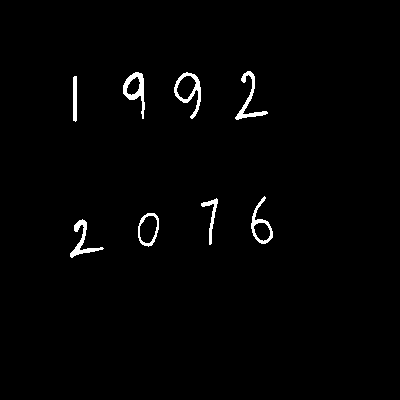

['2', '6', '9', '9', '7', '1', '2', '0']


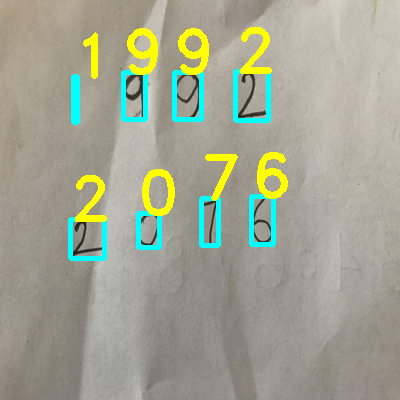

-1

In [3]:
# Import the modules
import cv2
from sklearn.externals import joblib
from skimage.feature import hog
import numpy as np
from imutils.object_detection import non_max_suppression
from google.colab.patches import cv2_imshow
import imutils

# # Load the classifier
# clf = joblib.load("digits_cls.pkl")

# Read the input image 
im = cv2.imread("test2.jpg")

# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

# Threshold the image
im_th = cv2.threshold(im_gray, 118, 255, cv2.THRESH_BINARY_INV)[1]
cv2_imshow(im_th)
# Find contours in the image
ctrs = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

ctrs = imutils.grab_contours(ctrs)

# Get rectangles contains each contour
rects = np.array([cv2.boundingRect(ctr) for ctr in ctrs])
# print(rects)
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
# #idxs = cv2.dnn.NMSBoxes(rects, confidences, 0.5, 0.3)
text = []
# For each rectangular region, calculate HOG features and predict
# the digit using Linear SVM.
for rect in pick:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (255, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    
    roi = cv2.dilate(roi, (3, 3))
    
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(7, 7), cells_per_block=(1, 1), visualise=False)
    
    nbr = clf.predict(np.array([roi_hog_fd], 'float64'))
    text.append(str(int(nbr[0])))
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)
print(text)
cv2_imshow(im)
cv2.waitKey()

In [0]:
#!pip install gtts

In [0]:
description = ', '.join(text)
from gtts import gTTS
tts = gTTS(description, lang='en')
tts.save('tts.mp3')

In [9]:
np.array([roi_hog_fd], 'float64').shape

(1, 144)